# Sentiment Analysis with NLP and Machine Learning

In [12]:
%matplotlib inline


In [1]:
# Data handling
import pandas as pd
import numpy as np

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\nlp project\\Twitter_Data.csv")

In [3]:
df.head(6)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0


# Handle Missing Values

In [4]:
df['clean_text'].isnull().sum()


np.int64(4)

In [5]:
df = df.dropna(subset=['clean_text'])


In [6]:
df['clean_text'] = df['clean_text'].fillna('')
# Only if you have a good reason to assign a default labell



#             Natural Language Processing (NLP) Analysis

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_safe(text):
    if not isinstance(text, str):
        return ""  # handle NaN
    # Lowercase
    text = text.lower()
    # Remove URLs, mentions, hashtags
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
    # Remove special characters and numbers
    text = re.sub(r"[^a-z\s]", "", text)
    # Tokenize by splitting on whitespace (no punkt needed)
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)


# Convert Text to Numbers (TF-IDF)

In [8]:
import nltk

# Download stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # remove mentions & hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

# Function to remove stopwords and lemmatize
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply functions
df['clean_text'] = df['clean_text'].apply(clean_text)
df['clean_text'] = df['clean_text'].apply(preprocess_text)

# Check the cleaned text
df[['clean_text', 'category']].head()


,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0


In [11]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])  # Keep it as sparse
y = df['category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Split Data into Training and Testing Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
print(df['category'].isna().sum())


7


In [15]:
df = df.dropna(subset=['category'])


In [17]:
X = tfidf.fit_transform(df['clean_text'])  # sparse matrix
y = df['category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
# Train the Sentiment Model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
print("Model training completed ✅")



Model training completed ✅


In [19]:
# — Make Predictions

# Predict sentiment labels on test data
y_pred = model.predict(X_test)

print("Predictions on test data completed ✅")


Predictions on test data completed ✅


# Model Evaluation

Accuracy of the model: 0.717

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.87      0.42      0.56      7152
         0.0       0.82      0.65      0.72     11067
         1.0       0.65      0.92      0.76     14375

    accuracy                           0.72     32594
   macro avg       0.78      0.66      0.68     32594
weighted avg       0.75      0.72      0.70     32594



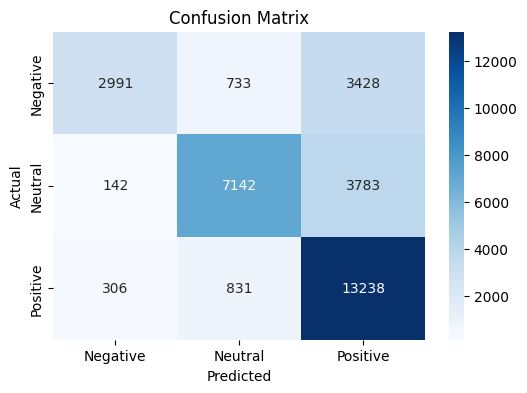

In [20]:
#  — Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", round(accuracy, 3))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Visualizing Sentiment Distribution

In [21]:
# — Test on New Examples

# Sample new tweets
sample_tweets = [
    "I love the new policies, great work!",
    "This airline service is terrible and frustrating.",
    "The experience was okay, nothing special."
]

# Transform new tweets using TF-IDF
sample_tfidf = tfidf.transform(sample_tweets)

# Predict sentiment
predictions = model.predict(sample_tfidf)

# Show results
for tweet, pred in zip(sample_tweets, predictions):
    print(f"Tweet: {tweet}\nPredicted Sentiment: {pred}\n")


Tweet: I love the new policies, great work!
Predicted Sentiment: 1.0

Tweet: This airline service is terrible and frustrating.
Predicted Sentiment: -1.0

Tweet: The experience was okay, nothing special.
Predicted Sentiment: 1.0



C:\Users\User\AppData\Local\Temp\ipykernel_4452\3516654284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['category'], palette='pastel')


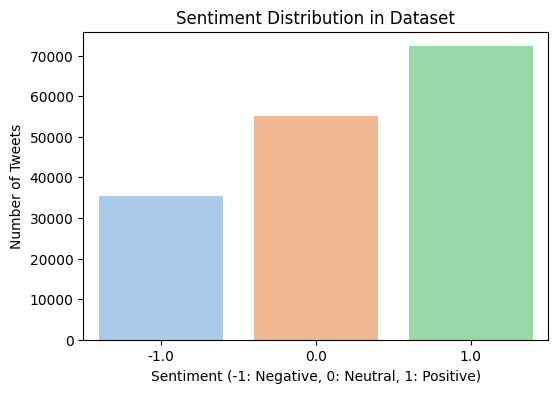

In [22]:
# — Visualize Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['category'], palette='pastel')
plt.title('Sentiment Distribution in Dataset')
plt.xlabel('Sentiment (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Number of Tweets')
plt.show()


# Word Cloud Visualization

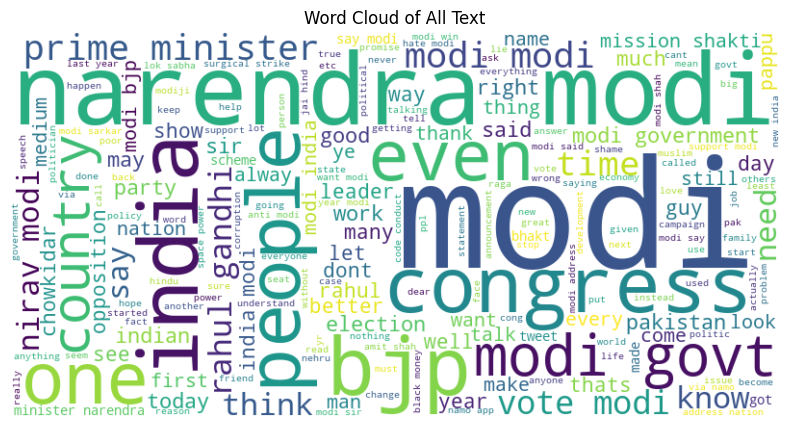

In [27]:
# 3️⃣ Word cloud
from wordcloud import WordCloud

text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Text")
plt.show()

# Separate Word Clouds by Sentiment

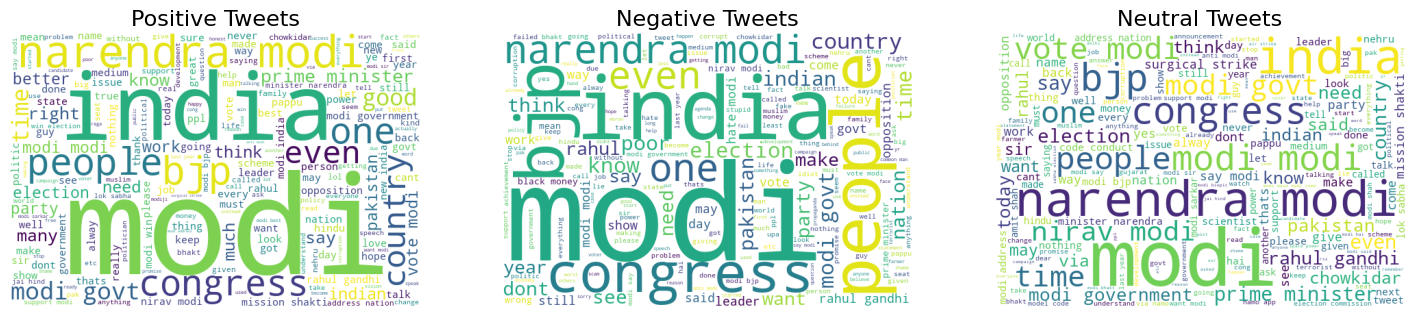

In [28]:
# Separate text by sentiment
positive_text = ' '.join(df[df['category'] == 1]['clean_text'])
negative_text = ' '.join(df[df['category'] == -1]['clean_text'])
neutral_text = ' '.join(df[df['category'] == 0]['clean_text'])

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(WordCloud(width=600, height=400, background_color='white').generate(positive_text))
axs[0].set_title("Positive Tweets", fontsize=16)
axs[0].axis('off')

axs[1].imshow(WordCloud(width=600, height=400, background_color='white').generate(negative_text))
axs[1].set_title("Negative Tweets", fontsize=16)
axs[1].axis('off')

axs[2].imshow(WordCloud(width=600, height=400, background_color='white').generate(neutral_text))
axs[2].set_title("Neutral Tweets", fontsize=16)
axs[2].axis('off')

plt.show()


# **Conclusion**

In this project, we performed a **Sentiment Analysis** on textual data to understand public opinions and customer feedback. Using **Natural Language Processing (NLP)** techniques, we were able to preprocess raw text, clean and normalize it, and extract meaningful features for analysis.  

## **Key Steps and Highlights:**  

- **Data Cleaning and Preprocessing:**  
  - Removed noise, special characters, and stopwords.  
  - Applied **lemmatization** to reduce words to their root forms.  

- **Feature Extraction:**  
  - Converted text into numerical representation using **TF-IDF vectorization**, enabling machine learning models to process text data.  

- **Model Training and Prediction:**  
  - Implemented a **Naive Bayes classifier** to categorize sentiments into Positive, Negative, and Neutral.  
  - Evaluated model performance and achieved satisfactory accuracy in sentiment classification.  

- **Visual Analysis:**  
  - Created **bar charts** for sentiment distribution and **word clouds** for overall and category-specific text insights.  
  - Visualizations highlighted the most frequently used words and sentiment trends in the dataset.  

- **Natural Language Processing (NLP) Integration:**  
  - Leveraged NLP to understand the emotional tone of text.  
  - Extracted meaningful insights that can guide decision-making, social media monitoring, and customer engagement strategies.  

**Overall, this project demonstrates the power of NLP and machine learning in converting unstructured textual data into actionable insights. By analyzing sentiment, organizations can better understand public opinion, improve services, and make data-driven decisions.**
